## Reference: 8th code from Session 4.
##Applied:

1.   Image Normalisation
2.   L2 Regularisation
3.   Incorporated Relu activation after Batch normalisation

##Saved the Model with Best Accuracy to use for Prediction. Created an Image Gallery with false precition class images.

###Import Libraries

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

from keras.datasets import mnist

###Load Train and Test Data

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


###Print Shape of Train Data and First Image

(60000, 28, 28)


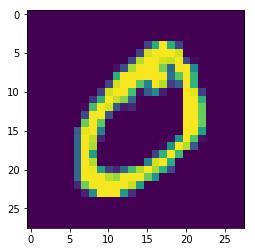

In [30]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

###Reshape the Data

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

#### Calculate pixel means and standard deviations

In [32]:
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (X_train.mean(), X_train.std(), X_test.mean(), X_test.std()))

Statistics train=33.318 (78.567), test=33.791 (79.172)


### Apply Image Normalization

In [35]:

datamachine = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True) # Data Machine that generates the centers of pixel values
datamachine.fit(X_train) #Calcuate the Mean of Train Data
print('Mean of Data Machine=%.3f, Std Deviation of Data Machine=%.3f' % (datamachine.mean, datamachine.std))

Mean of Data Machine=33.318, Std Deviation of Data Machine=78.567


In [39]:
iterator = datagen.flow(X_train, y_train, batch_size=64) # Experiement the effect on a single batch of samples
batchX, batchy = iterator.next() #Get a next value of batch
print((batchX.shape, batchX.mean(), batchX.std())) #Print Shape, Mean and Standard Deviation of the Batch


((64, 28, 28, 1), 0.01904153, 1.020691)


In [40]:
iterator = datagen.flow(X_train, y_train, batch_size=len(X_train), shuffle=False) #Experiement on an entire Training Data
batchX, batchy = iterator.next()
print(batchX.shape, batchX.mean(), batchX.std()) #Print Shape, Mean and Standard Deviation of the Batch

(60000, 28, 28, 1) -3.4560264e-07 0.9999998


In [41]:
print(batchy.shape, batchy.mean(), batchy.std())

(60000,) 4.4539333333333335 2.889246360020012


In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [43]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

###Network Architecture
###Apply L2 Regularization and Relu after Batch Normalization

In [47]:
from keras.layers import Activation
from keras import regularizers

model = Sequential()
 
model.add(Convolution2D(16, 3, 3, kernel_regularizer= regularizers.l2(0.0001),input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, kernel_regularizer= regularizers.l2(0.0001))) #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu', kernel_regularizer= regularizers.l2(0.0001))) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3, kernel_regularizer= regularizers.l2(0.0001)))#9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, kernel_regularizer= regularizers.l2(0.0001)))#7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, kernel_regularizer= regularizers.l2(0.0001)))#5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, kernel_regularizer= regularizers.l2(0.0001)))#3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg...)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", kernel_regularizer=<keras.reg...)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_29 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_33 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_30 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_34 (Activation)   (None, 24, 24, 32)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


###Compile the Model and Incorporate Learning Rate. Save the Model with Best Accuracy

In [49]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint


model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
# checkpoint for saving model with best accuracy
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model.fit(X_train, Y_train, batch_size=128, epochs=40, verbose=1, validation_data=(X_test, Y_test), callbacks= callbacks_list) #[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 17s 276us/step - loss: 0.3642 - acc: 0.8827 - val_loss: 0.0884 - val_acc: 0.9883

Epoch 00001: val_acc improved from -inf to 0.98830, saving model to weights.best.hdf5
Epoch 2/40
60000/60000 [==============================] - 13s 224us/step - loss: 0.3270 - acc: 0.8890 - val_loss: 0.0652 - val_acc: 0.9899

Epoch 00002: val_acc improved from 0.98830 to 0.98990, saving model to weights.best.hdf5
Epoch 3/40
60000/60000 [==============================] - 13s 223us/step - loss: 0.3186 - acc: 0.8887 - val_loss: 0.0632 - val_acc: 0.9903

Epoch 00003: val_acc improved from 0.98990 to 0.99030, saving model to weights.best.hdf5
Epoch 4/40
60000/60000 [==============================] - 13s 222us/step - loss: 0.3137 - acc: 0.8882 - val_loss: 0.0649 - val_acc: 0.9892

Epoch 00004: val_acc did not improve from 0.99030
Epoch 5/40
60000/60000 [==============================] - 13s 223us/step - l

###Save the model with best accuracy achieved in previous line

In [50]:
model.load_weights("weights.best.hdf5") # Load weights from the best saved model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Compile model
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.016217265635728836, 0.9988499975204468]


### Image Gallery of False predictions

# false predictions:  52 out of 10000


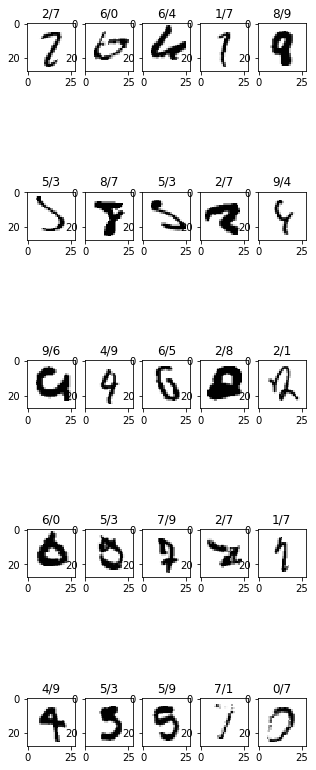

In [55]:
import matplotlib.cm as cm

def one_hot_to_dense(labels_one_hot):
    return np.argmax(labels_one_hot,1)
  
y_valid_pred = model.predict(X_test, verbose=0)
y_valid_pred_label = one_hot_to_dense(y_valid_pred)
y_valid_label = one_hot_to_dense(Y_test)
y_val_false_index = []

for i in range(y_valid_label.shape[0]):
    if y_valid_pred_label[i] != y_valid_label[i]:
        y_val_false_index.append(i)

print('# false predictions: ', len(y_val_false_index),'out of', len(Y_test))
# Building Image Gallery of the 30 Predicted classes
plt.figure(figsize=(5,15))
for j in range(0,5):
    for i in range(0,5):
        if j*10+i<len(y_val_false_index):
            plt.subplot(5,5,j*5+i+1)
            plt.title('%d/%d'%(y_valid_label[y_val_false_index[j*10+i]],
                               y_valid_pred_label[y_val_false_index[j*10+i]]))
            plt.imshow(X_test[y_val_false_index[j*10+i]].reshape(28,28),cmap=cm.binary)    

### My Network could get 52 Misclassified Images. Out of 52 only classifying the 25 Misclassified Images from the Validation Dataset